# Networkx

## kakaotalk 대화 내역을 Networkx로 나타내기
- 지난 학기 디자인팀 톡방 내용 중 일부를 사용합니다.
- 대화 참여자를 node로, 대화(관계)를 edge로 나타냅니다.
- centrality가 높은 node일수록 크기를 크게 합니다.
- 오간 대화 수가 많을수록 큰 weight를 가지도록 edge를 설정합니다.
- 이를 통해 디자인팀 내의 network에 대하여 알아봅시다!

## 1. 데이터 불러오기

In [3]:
# Import necessary modules
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import re

In [2]:
kakao = pd.read_csv('design_kakaotalk.csv')
kakao.head()

,Unnamed: 0,name,date,chat
0,0,박준성,2019-08-26 14:25:00,👏2019년 2학기 디자인팀 카톡방입니다!👏안녕하세요. 이번 학기 디자인팀 팀장을...
1,1,박준성,2019-08-26 14:25:00,톡게시판 '공지': 👏2019년 2학기 디자인팀 카톡방입니다!👏안녕하세요. 이번 ...
2,2,유건욱,2019-08-26 14:26:00,반가워요~!
3,3,유건욱,2019-08-26 14:26:00,이모티콘
4,4,박준성,2019-08-26 14:26:00,톡게시판 '투표': 9월 7일 토요일 세션 시간


## 2. 데이터 정리하기

In [4]:
# 바로 다음에 채팅을 보낸 사람을 타겟이라고 가정합니다. 

kakao['speak_to'] = kakao['name'][0]


for i in range(2936):
    if i == 2935:
        break
        
    else:
        kakao['speak_to'][i] = kakao['name'][i+1]     

c:\python\python36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [5]:
# name과 speak_to 가 같은 경우는 제외합니다.

for i in range(2936):
    if kakao['speak_to'][i] == kakao['name'][i]:
        kakao = kakao.drop([i], axis = 0)

## 3. 네트워크 그려보기

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arita-dotum4.0(TTF)'

In [6]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as mpl
from matplotlib import rc
mpl.rcParams['axes.unicode_minus'] = False
#그래프에서 - 폰트 깨지는거 방지
fontlocation="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=fontlocation).get_name()
rc('font', family=font_name)
from matplotlib import style

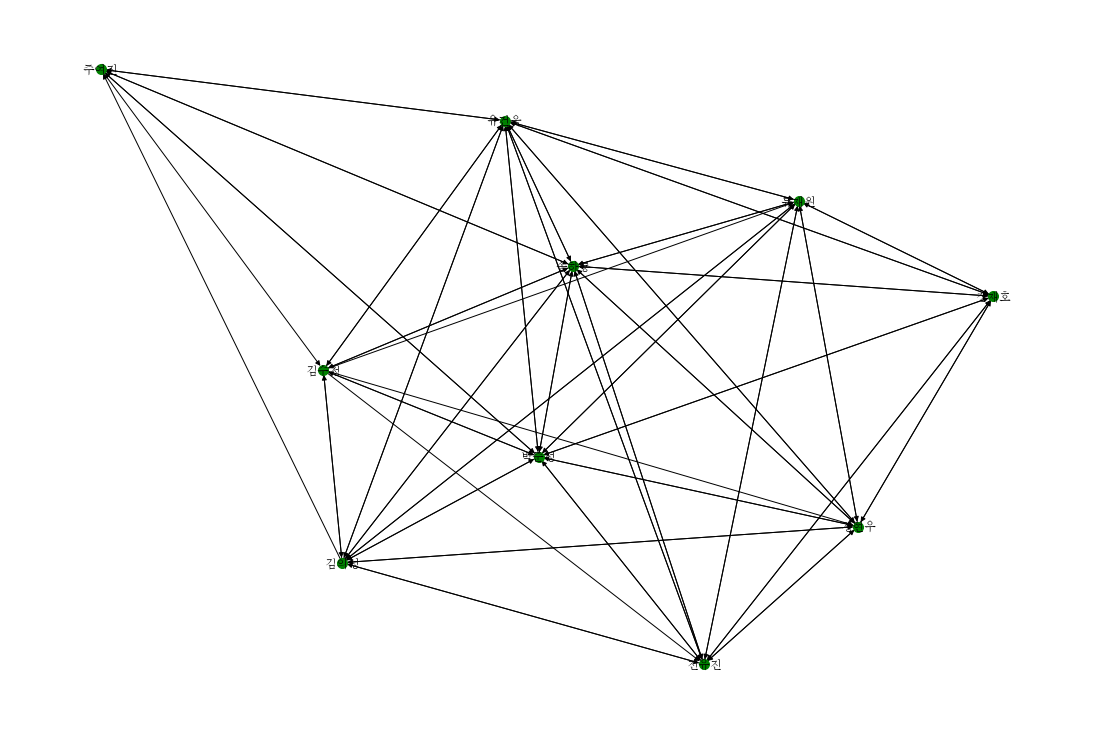

In [24]:
# 대화의 흐름을 알아보기 위해서는 nx.digraph를 이용하는 것이 좋겠습니다.
# 빈 그래프 생성
G = nx.from_pandas_edgelist(kakao, 'name', 'speak_to', create_using=nx.DiGraph()) 
 
# Plot it
plt.figure(figsize=(15, 10))
nx.draw(G,
        with_labels=True,
        node_color="green",
        node_size = 100,
        #pos = pos,
        font_family=font_name
       )

### Node Weight 반영하기

#### Node Weight의 기준을 2가지로 해보겠습니다.
- degree
- betweenness centrality

In [8]:
# degree값 구하기
degree = dict(G.degree())
degree

{'박준성': 18,
 '유건욱': 18,
 '송하룡': 18,
 '전유진': 15,
 '장재호': 12,
 '김수정': 12,
 '김의성': 15,
 '정현우': 15,
 '류재원': 15,
 '주여진': 8}

In [9]:
# degree값이 높은 순서대로
import operator
a = sorted(degree.items(), reverse= True, key = operator.itemgetter(1))
a

[('박준성', 18),
 ('유건욱', 18),
 ('송하룡', 18),
 ('전유진', 15),
 ('김의성', 15),
 ('정현우', 15),
 ('류재원', 15),
 ('장재호', 12),
 ('김수정', 12),
 ('주여진', 8)]

c:\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50865 missing from current font.
  font.set_text(s, 0.0,

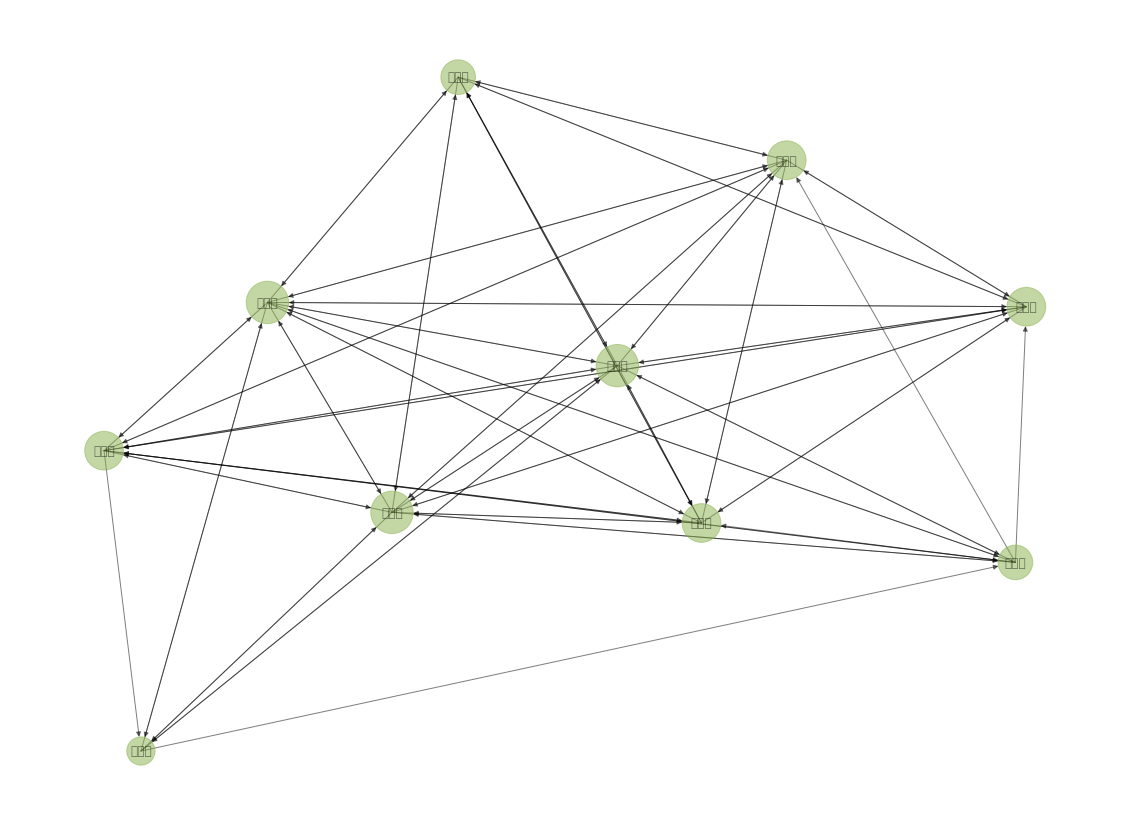

In [10]:
# 많은 관계를 가질 수록 node를 크게 만들기
graph_degrees = G.degree() # Degree 값 구하기
node_sizes = [graph_degrees[x] * 100 for x in G.nodes] # Node Size로 Rescale

plt.figure(figsize=(20, 15))
plt.axis('off')
nx.draw_networkx(G, node_size=node_sizes, node_color='#88B04B', alpha=0.5)

In [11]:
# betweenness centrality를 구해보겠습니다.
bet = nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)
bet

{'박준성': 0.059027777777777776,
 '유건욱': 0.059027777777777776,
 '송하룡': 0.059027777777777776,
 '전유진': 0.006944444444444444,
 '장재호': 0.0,
 '김수정': 0.013888888888888888,
 '김의성': 0.024305555555555552,
 '정현우': 0.006944444444444444,
 '류재원': 0.006944444444444444,
 '주여진': 0.0}

In [12]:
# betweenness centrality가 가장 높은 순서대로
import operator
a = sorted(bet.items(), reverse= True, key = operator.itemgetter(1))
a

[('박준성', 0.059027777777777776),
 ('유건욱', 0.059027777777777776),
 ('송하룡', 0.059027777777777776),
 ('김의성', 0.024305555555555552),
 ('김수정', 0.013888888888888888),
 ('전유진', 0.006944444444444444),
 ('정현우', 0.006944444444444444),
 ('류재원', 0.006944444444444444),
 ('장재호', 0.0),
 ('주여진', 0.0)]

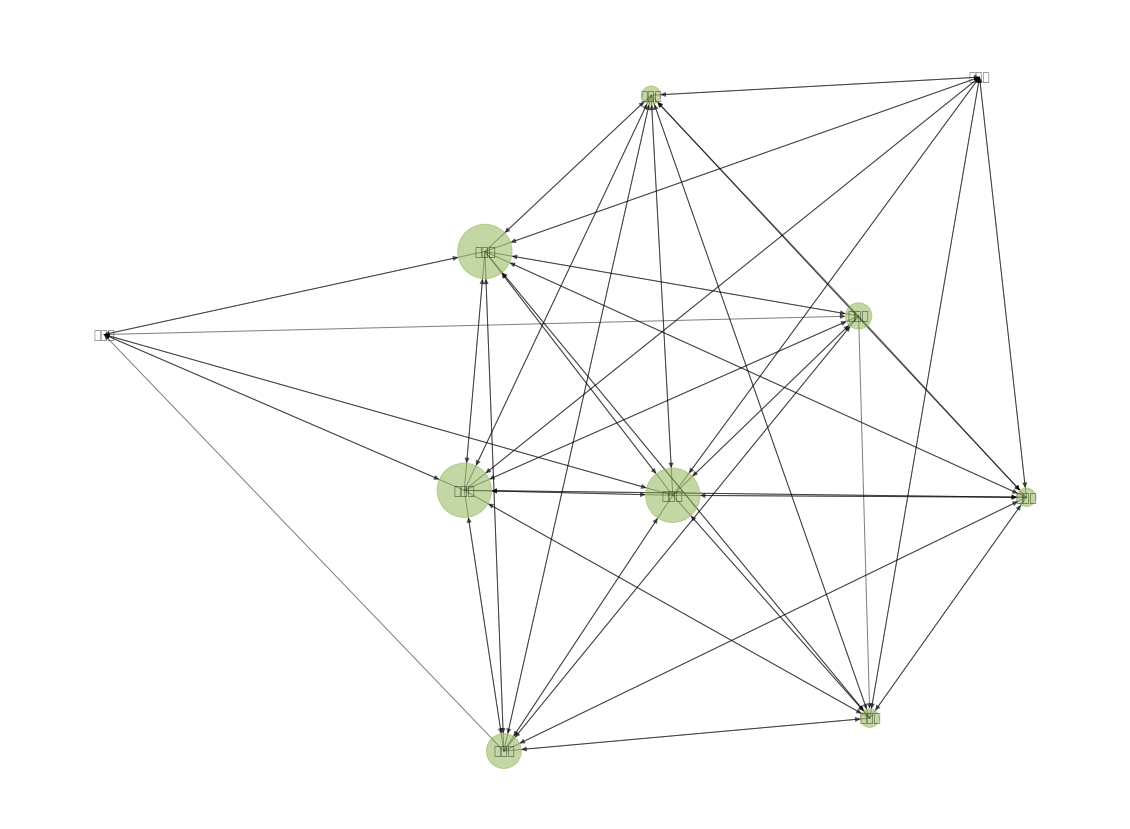

In [29]:
# 많은 관계를 가질 수록 node를 크게 만들기
node_sizes = [bet[x] * 50000 for x in G.nodes] # Node Size로 Rescale

plt.rcParams['font.family'] = 'Arita-dotum4.0(TTF)'
plt.figure(figsize=(20, 15))
plt.axis('off')
nx.draw_networkx(G, node_size=node_sizes, node_color='#88B04B', alpha=0.5)

### Edge Weight 반영하기

In [14]:
edges = pd.DataFrame()

In [15]:
# Source와 Target변수를 가지는 edges 테이블을 새로 만들어줍니다.

edges['Source'] = kakao['name']
edges['Target'] = kakao['speak_to']

In [16]:
# 중복을 제거해줍니다.
edges = edges.drop_duplicates()
edges = edges.reset_index()

In [17]:
# Weights 칼럼을 만들어줍니다.
edges['Weights'] = 0

In [18]:
edges.head()

,index,Source,Target,Weights
0,1,박준성,유건욱,0
1,3,유건욱,박준성,0
2,7,박준성,송하룡,0
3,8,송하룡,유건욱,0
4,9,유건욱,전유진,0


In [19]:
kakao = kakao.reset_index()
kakao.head()

,index,Unnamed: 0,name,date,chat,speak_to
0,1,1,박준성,2019-08-26 14:25:00,톡게시판 '공지': 👏2019년 2학기 디자인팀 카톡방입니다!👏안녕하세요. 이번 ...,유건욱
1,3,3,유건욱,2019-08-26 14:26:00,이모티콘,박준성
2,7,7,박준성,2019-08-26 14:28:00,추가해줭,송하룡
3,8,8,송하룡,2019-08-26 14:29:00,<디자인팀 폰번호 구글계정>박준성/01020016554/rytt00@gmail.c...,유건욱
4,9,9,유건욱,2019-08-26 14:29:00,박준성/01020016554/rytt00@gmail.com류재원//장재호//유건욱...,전유진


In [20]:
# 말하는 사람, 대답한 사람에 따른 weight를 구해줍니다.

list = []

for x in range(73):
    i = 0
    for y in range(1325):
        if kakao['name'][y] == edges['Source'][x] and kakao['speak_to'][y] == edges['Target'][x]:
            i = i+1
        else:
            i = i
    list.append(i)

list

[162,
 147,
 73,
 47,
 12,
 3,
 21,
 20,
 1,
 2,
 20,
 37,
 27,
 81,
 84,
 30,
 29,
 9,
 78,
 34,
 19,
 2,
 15,
 11,
 26,
 5,
 4,
 56,
 15,
 10,
 3,
 1,
 15,
 2,
 7,
 16,
 31,
 4,
 24,
 16,
 14,
 6,
 9,
 11,
 2,
 2,
 1,
 1,
 5,
 9,
 16,
 2,
 2,
 2,
 6,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 5,
 2,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 2]

In [21]:
edges['Weights'] = list
edges.head()

,index,Source,Target,Weights
0,1,박준성,유건욱,162
1,3,유건욱,박준성,147
2,7,박준성,송하룡,73
3,8,송하룡,유건욱,47
4,9,유건욱,전유진,12


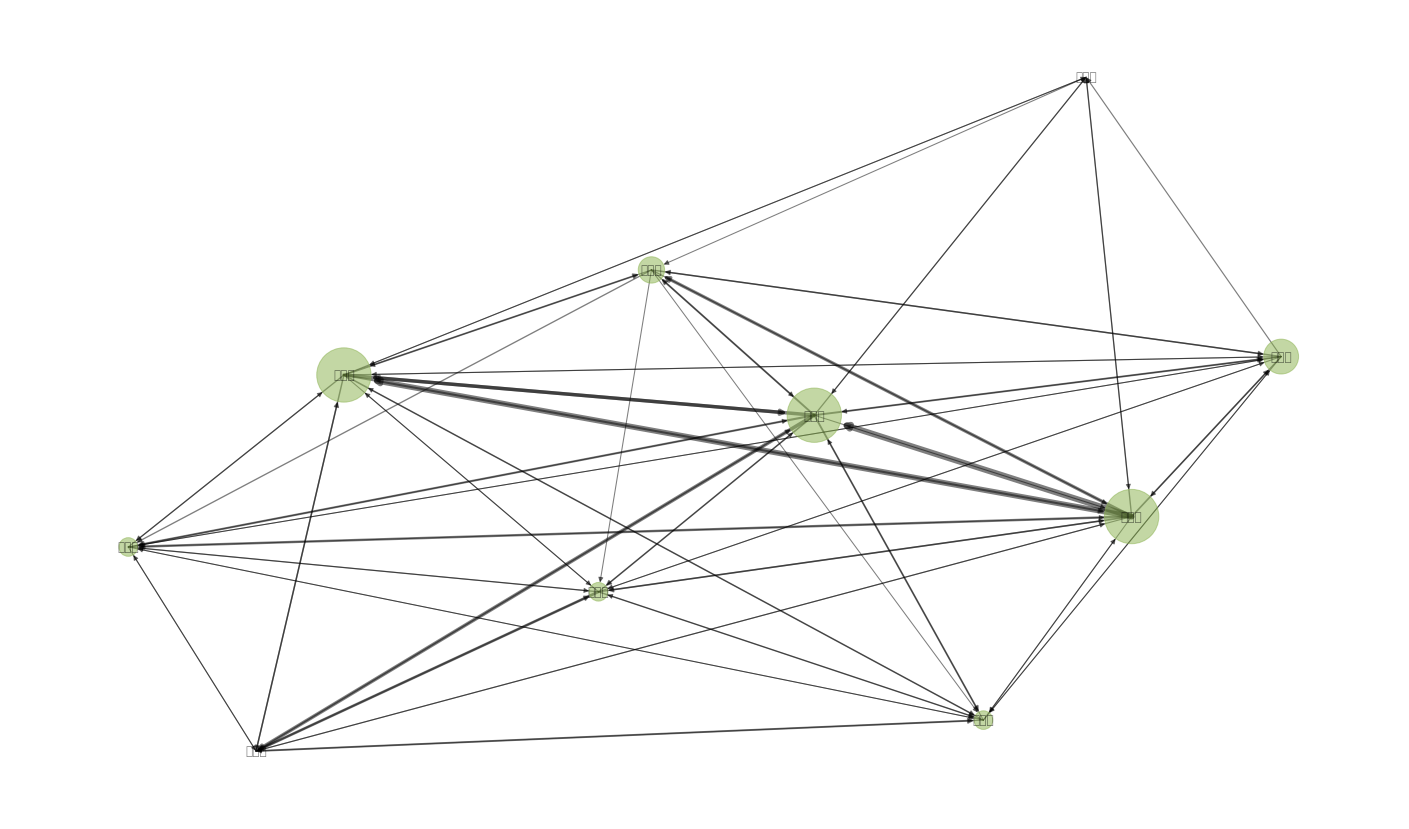

In [26]:
# 관계가 강할수록 edge의 굵기를 굵게하기
edge_width = list
# 1~10 정도로 스케일을 조정한다
edge_width = [(x / max(edge_width) * 5) + 1 for x in edge_width]

plt.figure(figsize=(25, 15))
plt.axis('off')
nx.draw_networkx(G, 
                 node_size=node_sizes, width=edge_width,
                 node_color='#88B04B', alpha=0.5)